In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load the sample dataset
data = pd.read_csv('C:/Users/Imran/OneDrive - Ontario Tech University/Documents/Capstone/0.5_test_GA.csv')

In [3]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
labels = data['target']

In [6]:
features = data.drop('target', axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

### Creating an individual model

In [9]:
# Define and train the model
def create_ann(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Single output for regression
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create and train the model
single_model = create_ann(input_dim=X_train.shape[1])
single_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - loss: 31151116.0000 - val_loss: 451767.0000
Epoch 2/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 49s 1ms/step - loss: 393284.3438 - val_loss: 249163.1875
Epoch 3/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - loss: 240724.6250 - val_loss: 219131.7500
Epoch 4/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - loss: 215453.6562 - val_loss: 209574.0781
Epoch 5/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - loss: 206936.9375 - val_loss: 190923.1562
Epoch 6/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - loss: 193393.5625 - val_loss: 192186.4062
Epoch 7/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - loss: 191501.3281 - val_loss: 189196.0156
Epoch 8/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 51s 1ms/step - loss: 180097.8125 - val_loss: 171194.2812
Epoch 9/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - loss: 179363.1562 - val_loss: 167766.5312
Epoch 10/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - loss: 174914.4688 - val_loss:

In [10]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [11]:
features_km = pd.DataFrame(features)
features_km['target'] = labels

### Creating the hybrid model

In [13]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features)

# Add cluster labels to the dataset
features_km['cluster'] = clusters

In [14]:
def create_ann(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to train ANN on a specific cluster
def train_ann_on_cluster(cluster_data):
    features = cluster_data.drop(['target', 'cluster'], axis=1)
    labels = cluster_data['target']
    
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    
    ann = create_ann(input_dim=features.shape[1])
    ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
    
    return ann

In [15]:
# Train an ANN for each cluster
ann_models = {}
for cluster in range(3):
    cluster_data = features_km[features_km['cluster'] == cluster]
    ann_models[cluster] = train_ann_on_cluster(cluster_data)

Epoch 1/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 497425632.0000 - val_loss: 121049280.0000
Epoch 2/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 76679072.0000 - val_loss: 37209224.0000
Epoch 3/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 34120160.0000 - val_loss: 24139396.0000
Epoch 4/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22945400.0000 - val_loss: 17786450.0000
Epoch 5/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17955314.0000 - val_loss: 14005124.0000
Epoch 6/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14384429.0000 - val_loss: 11251542.0000
Epoch 7/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11516112.0000 - val_loss: 9134687.0000
Epoch 8/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9380099.0000 - val_loss: 7447597.0000
Epoch 9/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7525927.5000 - val_loss: 6122059.0000
Epoch 10/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6084241.5000 - val_loss: 5099675.0000
Epoc

In [16]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
# Assign each sample in the test set to a cluster
test_clusters = kmeans.predict(X_test)

# Initialize an array to hold the predictions
combined_predictions = np.zeros_like(y_test)

In [18]:
# Make predictions using the corresponding model for each cluster
for cluster in range(3):
    cluster_indices = np.where(test_clusters == cluster)[0]
    if len(cluster_indices) > 0:
        X_cluster = X_test.iloc[cluster_indices]  # Use .iloc to select rows by index
        model = ann_models[cluster]
        combined_predictions[cluster_indices] = model.predict(X_cluster).flatten()

# Evaluate the combined performance
combined_mse = mean_squared_error(y_test, combined_predictions)
combined_rmse = np.sqrt(combined_mse)
combined_mae = mean_absolute_error(y_test, combined_predictions)
combined_r2 = r2_score(y_test, combined_predictions)

print(f'Combined Model MSE: {combined_mse}')
print(f'Combined Model RMSE: {combined_rmse}')
print(f'Combined Model MAE: {combined_mae}')
print(f'Combined Model R²: {combined_r2}')

140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
5656/5656 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
2631/2631 ━━━━━━━━━━━━━━━━━━━━ 2s 668us/step
Combined Model MSE: 153817.82802556554
Combined Model RMSE: 392.1961601361818
Combined Model MAE: 142.45132631767035
Combined Model R²: 0.998327408392632


In [19]:
# Make predictions using the single model
single_predictions = single_model.predict(X_test).flatten()

# Evaluate the performance
single_mse = mean_squared_error(y_test, single_predictions)
single_rmse = np.sqrt(single_mse)
single_mae = mean_absolute_error(y_test, single_predictions)
single_r2 = r2_score(y_test, single_predictions)

print(f'Single Model MSE: {single_mse}')
print(f'Single Model RMSE: {single_rmse}')
print(f'Single Model MAE: {single_mae}')
print(f'Single Model R²: {single_r2}')

8426/8426 ━━━━━━━━━━━━━━━━━━━━ 8s 917us/step
Single Model MSE: 143147.6039029114
Single Model RMSE: 378.34852174009006
Single Model MAE: 129.51646952617787
Single Model R²: 0.9984434347827155


In [20]:
#create a dataframe of scores
performance_metrics = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Single Model': [single_mse, single_rmse, single_mae, single_r2],
    'Combined Model': [combined_mse, combined_rmse, combined_mae, combined_r2]
})

In [21]:
# Export the performance metrics to a CSV file
performance_metrics.to_csv('performance_metrics_GA_ANN.csv', index=False)

In [22]:
# Get the weights of the connections between input and hidden layers
weights_input_hidden = single_model.layers[0].get_weights()[0]

# Compute feature importances based on the weights
importances = np.mean(np.abs(weights_input_hidden), axis=1)

# Get the indices that would sort the importances array in descending order
sorted_indices = np.argsort(importances)[::-1]

# Display top 5 feature importance
top_n = 5
for i in range(top_n):
    print(f"Feature {sorted_indices[i]}: Importance {importances[sorted_indices[i]]}")

Feature 1: Importance 6.030089378356934
Feature 20: Importance 2.9286155700683594
Feature 25: Importance 2.838291645050049
Feature 7: Importance 2.836075782775879
Feature 28: Importance 2.340122699737549


In [75]:
column_names = ['annual_inc_joint', 'collection_recovery_fee', 'delinq_2yrs', 'earliest_cr_line', 'emp_length', 'inq_last_12m', 'inq_last_6mths', 'installment', 'int_rate', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'open_acc', 'open_il_24m', 'out_prncp', 'policy_code', 'pub_rec', 'tot_coll_amt', 'tot_cur_bal', 'total_cu_tl', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'term_OrdinalEncoded', 'initial_list_status_OrdinalEncoded', 'home_ownership_ANY', 'home_ownership_OWN', 'home_ownership_RENT', 'purpose_educational', 'purpose_vacation', 'pymnt_plan_OrdinalEncoded', 'never_delinq', 'never_major_derog', 'never_record', 'never_rcnt_il']

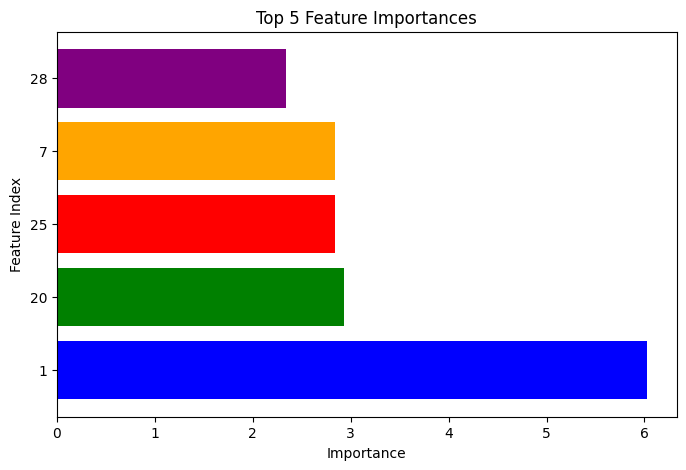

In [23]:
# Define colors for bars
colors = ['blue', 'green', 'red', 'orange', 'purple']

# Plot horizontal bar chart of top 5 feature importances with different colors
top_n = 5
plt.figure(figsize=(8, 5))
plt.barh(range(top_n), importances[sorted_indices][:top_n], align='center', color=colors)
plt.yticks(range(top_n), sorted_indices[:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature Index')
plt.title('Top 5 Feature Importances')
plt.show()

In [71]:
index = [1, 20, 25, 7, 28]

In [73]:
# Display names based on the given indices
selected_names = [column_names[i] for i in index]

# Print the selected names
for column_names in selected_names:
    print(column_names)

collection_recovery_fee
total_pymnt
home_ownership_ANY
installment
purpose_educational


In [24]:
# Get the weights of the connections between input and hidden layers
weights_input_hidden = model.layers[0].get_weights()[0]

# Compute feature importances based on the weights
importances = np.mean(np.abs(weights_input_hidden), axis=1)

# Get the indices that would sort the importances array in descending order
sorted_indices = np.argsort(importances)[::-1]

# Display top 5 feature importance
top_n = 5
for i in range(top_n):
    print(f"Feature {sorted_indices[i]}: Importance {importances[sorted_indices[i]]}")

Feature 1: Importance 4.713381290435791
Feature 7: Importance 2.8585031032562256
Feature 28: Importance 2.0500974655151367
Feature 20: Importance 1.9739563465118408
Feature 25: Importance 1.6647679805755615


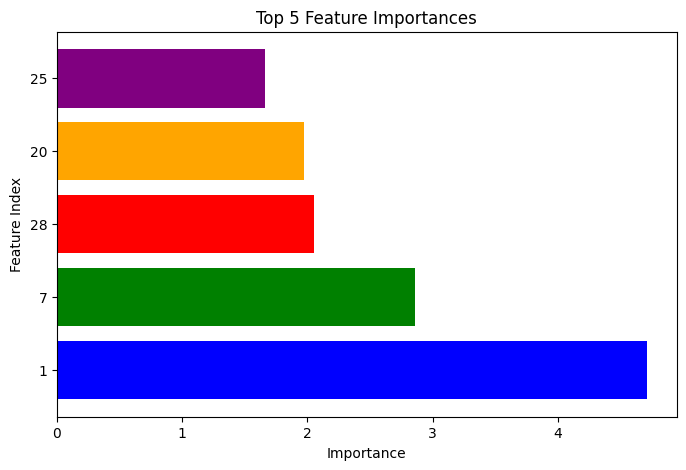

In [25]:
# Define colors for bars
colors = ['blue', 'green', 'red', 'orange', 'purple']

# Plot horizontal bar chart of top 5 feature importances with different colors
top_n = 5
plt.figure(figsize=(8, 5))
plt.barh(range(top_n), importances[sorted_indices][:top_n], align='center', color=colors)
plt.yticks(range(top_n), sorted_indices[:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature Index')
plt.title('Top 5 Feature Importances')
plt.show()

In [77]:
index1 = [1, 7, 28, 20, 25]

In [79]:
# Display names based on the given indices
selected_names = [column_names[i] for i in index1]

# Print the selected names
for column_names in selected_names:
    print(column_names)

collection_recovery_fee
installment
purpose_educational
total_pymnt
home_ownership_ANY
